In [1]:
#import necessary libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt # Matlab-style plotting

from scipy import stats
from scipy.stats import norm, skew # for some statistics

import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_classif



import warnings
warnings.filterwarnings("ignore")

In [2]:
# Now lets import the raw dataset and apply pd.set_option so that we can see all the columns
pd.set_option('display.max_columns', None) 
df = pd.read_csv('Data_Cortex_Nuclear.csv')

In [3]:
df.head(5)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.

In [4]:
df_mice = df.drop('MouseID',1)

In [5]:
df_mice.dtypes.value_counts()

float64    77
object      4
dtype: int64

In [6]:
# For each columns checking value counts
categorical_cols = df_mice.columns[df_mice.dtypes == np.object].tolist()
for categorical_col in categorical_cols:
    print(categorical_col + ':')
    print(df_mice[categorical_col].value_counts())
    print('\n')

Genotype:
Control    570
Ts65Dn     510
Name: Genotype, dtype: int64


Treatment:
Memantine    570
Saline       510
Name: Treatment, dtype: int64


Behavior:
S/C    555
C/S    525
Name: Behavior, dtype: int64


class:
c-SC-m    150
c-CS-m    150
c-SC-s    135
t-SC-m    135
t-SC-s    135
t-CS-m    135
c-CS-s    135
t-CS-s    105
Name: class, dtype: int64




In [7]:
df_mice.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1062.000000,1077.000000,1077.000000,1077.000000,1073.000000,1077.000000,1077.000000,1077.000000,1062.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,0.545904,0.313505,0.317939,0.275033,0.825813,0.726933,1.561965,1.525338,0.442848,0.682236,0.378519,0.363357,0.180492,1.173400,2.474492,1.172603,0.241644,0.272789,0.693180,0.168417,0.404808,2.146550,0.542635,0.452459,0.415311,0.759047,0.585186,0.368370,0.565317,0.357095,0.315813,0.418605,0.394475,0.181080,0.943116,0.161211,1.706599,0.292434,0.429226,1.197420,0.216482,0.166631,0.179307,0.121521,0.156478,0.181300,0.210489,0.120889,0.221851,0.126560,0.527349,0.291276,1.548348,2.235236,0.159821,1.239270,0.848767,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,0.345309,0.051978,0.052236,0.046164,0.117969,0.188013,0.270737,0.481780,0.066672,0.127434,0.216388,0.052352,0.026370,0.335786,0.653397,0.244752,0.033901,0.041075,0.120825,0.028138,0.061173,0.435742,0.280568,0.065488,0.089290,0.122446,0.100601,0.062583,0.088201,0.063025,0.054163,0.067288,0.156170,0.029296,0.172838,0.019308,0.578442,0.037380,0.137440,0.361743,0.185309,0.031896,0.018826,0.014276,0.015071,0.024919,0.069010,0.013233,0.034886,0.026885,0.082057,0.030015,0.248132,0.254395,0.024150,0.173580,0.094311,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,0.149155,0.052110,0.191431,0.056818,0.500160,0.281285,0.301609,0.567840,0.095942,0.064421,0.143894,0.212960,0.113636,0.497695,1.131796,0.151124,0.046298,0.147201,0.198743,0.107394,0.235595,1.134886,0.217120,0.201143,0.227880,0.166579,0.155321,0.226409,0.184785,0.185598,0.194824,0.237777,0.131120,0.117999,0.344120,0.099976,0.598767,0.181157,0.130206,0.529108,0.052528,-0.062008,0.072326,0.067254,0.100217,0.099734,0.096233,0.086114,0.111382,0.072580,0.284001,0.207438,0.853176,1.206098,0.101233,0.750664,0.577397,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,0.337405,0.281242,0.281829,0.244287,0.743491,0.590303,1.381288,1.168258,0.404144,0.596816,0.264334,0.330859,0.161830,0.944435,1.991756,1.023134,0.220400,0.247096,0.617074,0.149622,0.366339,1.826707,0.319639,0.410389,0.351992,0.683501,0.530881,0.326621,0.514892,0.312766,0.276127,0.371976,0.281090,0.

In [8]:
data = {'Column': df_mice.columns,
        'MissingValueCount':df_mice.isna().sum().values
        }

df_missingvalues = pd.DataFrame (data, columns = ['Column','MissingValueCount'])
missingvalue = df_missingvalues['MissingValueCount'] > 0

df_missingvalues[missingvalue]

,Column,MissingValueCount
0,DYRK1A_N,3
1,ITSN1_N,3
2,BDNF_N,3
3,NR1_N,3
4,NR2A_N,3
5,pAKT_N,3
6,pBRAF_N,3
7,pCAMKII_N,3
8,pCREB_N,3
9,pELK_N,3


In [9]:
#Checking the missing in the number of columns for each observation
data = df_mice.isnull().sum(axis=1)
df_missingvalues_rows = pd.DataFrame (data, columns = ['MissingValueColCount'])

In [10]:
#Checking the records with missing values in more than 40 columns
missingvalue_rows = df_missingvalues_rows['MissingValueColCount'] > 40
df_missingvalues_rows[missingvalue_rows]

,MissingValueColCount
987,43
988,43
989,43


In [11]:
#Dropping the records with missing values in more than 40 columns
missingvalue_rows = df_missingvalues_rows['MissingValueColCount'] > 40
df_missingvalues_rows[missingvalue_rows]
df_mice1 = df_mice.drop([987,988,989])
df_mice1.shape

(1077, 81)

In [12]:
#Check how many columns have missing values now
data = {'Column': df_mice1.columns,
        'MissingValueCount':df_mice1.isna().sum().values
        }

df_missingvalues = pd.DataFrame (data, columns = ['Column','MissingValueCount'])
missingvalue = df_missingvalues['MissingValueCount'] > 0

df_missingvalues[missingvalue]
missingvalueCols = df_missingvalues.loc[missingvalue,'Column'].tolist()

In [13]:
#replace missing values for each of the 9 columns with the mean of its resprective column
df_mice_fillna = df_mice1.copy()
#df_mice_fillna = df_mice_fillna.fillna(df_mice1.mean())
for column in missingvalueCols:
    df_mice_fillna[column].fillna(df_mice_fillna[column].mean(), inplace=True)

df_mice_fillna.isna().sum().value_counts()

0    81
dtype: int64

In [14]:
df_mice_fillna.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,0.545904,0.313505,0.317939,0.275033,0.825813,0.726933,1.561965,1.525338,0.442848,0.682236,0.378519,0.363357,0.180492,1.173400,2.474492,1.172603,0.241644,0.272789,0.693180,0.168417,0.404808,2.146550,0.542635,0.452459,0.415311,0.759047,0.585186,0.368370,0.565317,0.357095,0.315813,0.418605,0.394475,0.181071,0.942935,0.161130,1.703983,0.292349,0.428958,1.197919,0.216421,0.166585,0.179321,0.121528,0.156468,0.181305,0.210260,0.120876,0.221945,0.126587,0.527347,0.291197,1.548413,2.235409,0.159809,1.239272,0.848297,0.226754,0.157834,0.134757,0.121528,0.131114,0.446149,0.169620,0.183135,0.205414,1.337442
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,0.345309,0.051978,0.052236,0.046164,0.117969,0.188013,0.270737,0.481780,0.066672,0.127434,0.216388,0.052352,0.026370,0.333437,0.653397,0.244752,0.033901,0.040999,0.120825,0.028138,0.061173,0.432694,0.280568,0.065488,0.089290,0.122446,0.100601,0.062583,0.088201,0.063025,0.054163,0.067288,0.156170,0.029336,0.173039,0.019273,0.577116,0.037391,0.137538,0.362121,0.185563,0.031927,0.018847,0.014295,0.015089,0.024950,0.068968,0.013248,0.034888,0.026917,0.082167,0.030019,0.248458,0.254723,0.024182,0.173816,0.094009,0.028991,0.026469,0.023551,0.014295,0.023020,0.066507,0.054294,0.036302,0.048128,0.317499
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,0.149155,0.052110,0.191431,0.056818,0.500160,0.281285,0.301609,0.567840,0.095942,0.064421,0.143894,0.212960,0.113636,0.497695,1.131796,0.151124,0.046298,0.147201,0.198743,0.107394,0.235595,1.134886,0.217120,0.201143,0.227880,0.166579,0.155321,0.226409,0.184785,0.185598,0.194824,0.237777,0.131120,0.117999,0.344120,0.099976,0.598767,0.181157,0.130206,0.529108,0.052528,-0.062008,0.072326,0.067254,0.100217,0.099734,0.096233,0.086114,0.111382,0.072580,0.284001,0.207438,0.853176,1.206098,0.101233,0.750664,0.577397,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,0.337405,0.281242,0.281829,0.244287,0.743491,0.590303,1.381288,1.168258,0.404144,0.596816,0.264334,0.330859,0.161830,0.947184,1.991756,1.023134,0.220400,0.247170,0.617074,0.149622,0.366339,1.830056,0.319639,0.410389,0.351992,0.683501,0.530881,0.326621,0.514892,0.312766,0.276127,0.371976,0.2810

# Data Exploration

Exploring each numerical descriptive feature by looking at their distribution using boxplot.
we notice that there are outliers in many features. we decide to keep the outliers as these are showing up as outliers based on univariate analysis and they might not be true outliers.

In [16]:
df_boxplot = df_mice_fillna.loc[:,~df_mice_fillna.columns.isin(['Genotype','Treatment','Behavior','class'])]


df_boxplot1 = df_mice_fillna.loc[:,'DYRK1A_N':'PKCA_N']
df_boxplot2 = df_mice_fillna.loc[:,'pMEK_N':'GSK3B_N']
df_boxplot3 = df_mice_fillna.loc[:,'JNK_N':'NR2B_N']
df_boxplot4 = df_mice_fillna.loc[:,'RAPTOR_N':'RRP1_N']
df_boxplot5 = df_mice_fillna.loc[:,'BAX_N':'SNCA_N']
df_boxplot6 = df_mice_fillna.loc[:,'pGSK3B_Tyr216_N':'H3MeK4_N']

Text(0.5, 1.0, 'Protein distribution')

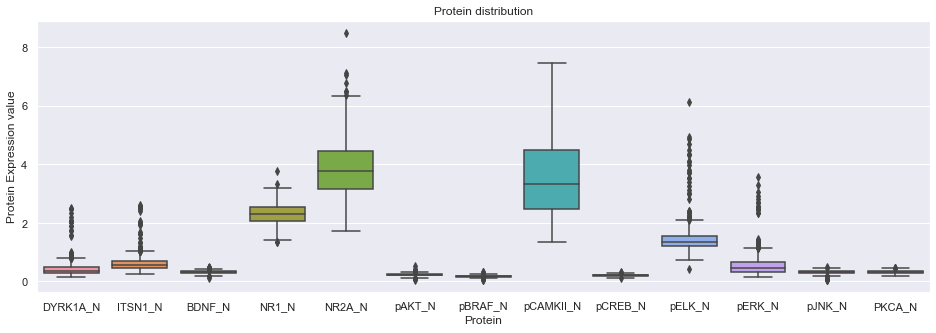

In [229]:
fig = plt.gcf()
plt.rcParams["axes.labelsize"] = 12
fig.set_size_inches( 16, 5)
fig=sns.boxplot(x="variable", y="value", data=pd.melt(df_boxplot1))
fig.set(xlabel='Protein', ylabel='Protein Expression value')
fig.set_title("Protein distribution")

Text(0.5, 1.0, 'Protein distribution')

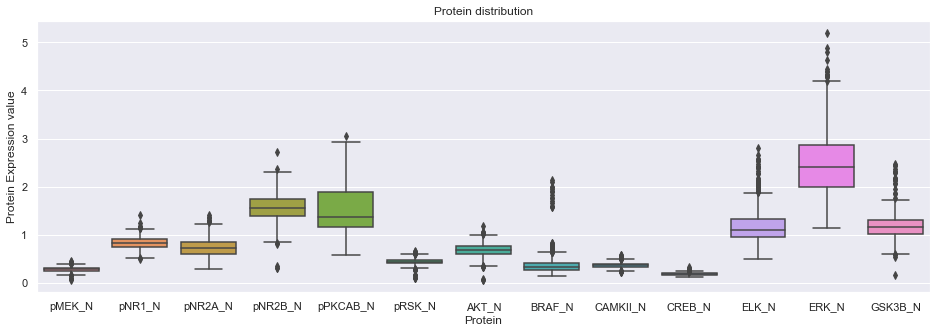

In [230]:
fig = plt.gcf()
fig.set_size_inches( 16, 5)
fig=sns.boxplot(x="variable", y="value", data=pd.melt(df_boxplot2))
fig.set(xlabel='Protein', ylabel='Protein Expression value')
fig.set_title("Protein distribution")

Text(0.5, 1.0, 'Protein distribution')

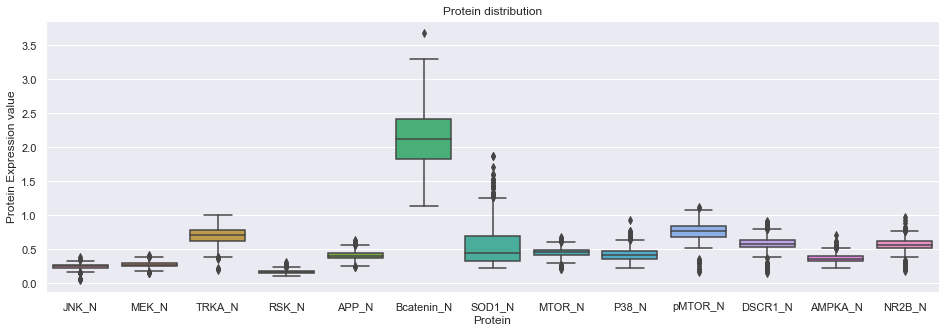

In [231]:
fig = plt.gcf()
fig.set_size_inches( 16, 5)
fig=sns.boxplot(x="variable", y="value", data=pd.melt(df_boxplot3))
fig.set(xlabel='Protein', ylabel='Protein Expression value')
fig.set_title("Protein distribution")

Text(0.5, 1.0, 'Protein distribution')

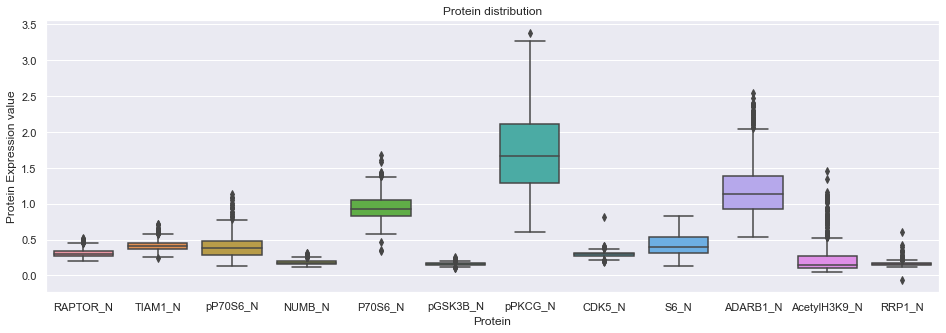

In [232]:
fig = plt.gcf()
fig.set_size_inches( 16, 5)
fig=sns.boxplot(x="variable", y="value", data=pd.melt(df_boxplot4))
fig.set(xlabel='Protein', ylabel='Protein Expression value')
fig.set_title("Protein distribution")

Text(0.5, 1.0, 'Protein distribution')

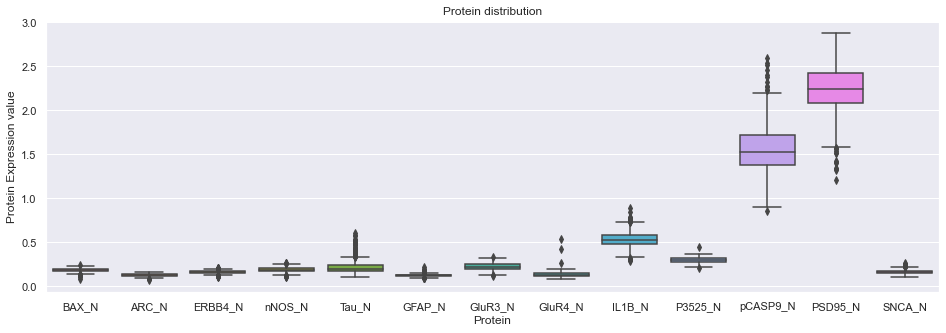

In [233]:
fig = plt.gcf()
fig.set_size_inches( 16, 5)
fig=sns.boxplot(x="variable", y="value", data=pd.melt(df_boxplot5))
fig.set(xlabel='Protein', ylabel='Protein Expression value')
fig.set_title("Protein distribution")

Text(0.5, 1.0, 'Protein distribution')

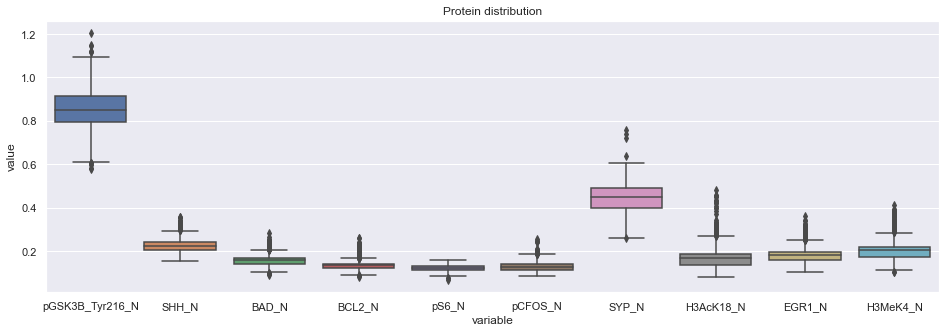

In [234]:
fig = plt.gcf()
fig.set_size_inches( 16, 5)
fig=sns.boxplot(x="variable", y="value", data=pd.melt(df_boxplot6))
fig.set_title("Protein distribution")
#fig.set(xlabel='Protein', ylabel='Protein Expression value')
#sns.boxplot(x="Protein", y="Protein expression value", data=pd.melt(df_boxplot6))
#plt.show()

Exploring categorical features by plotting the bar grapbhs on the number of observations.

Text(0, 0.5, 'Count')

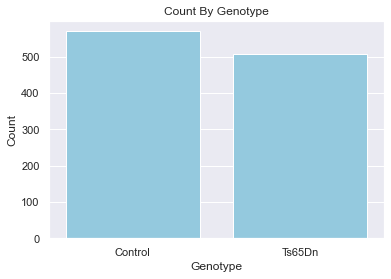

In [124]:
fig=sns.countplot(df_mice_fillna['Genotype'], color="skyblue") 
fig.set_title("Count By Genotype")
fig.set_ylabel("Count")

Text(0, 0.5, 'Count')

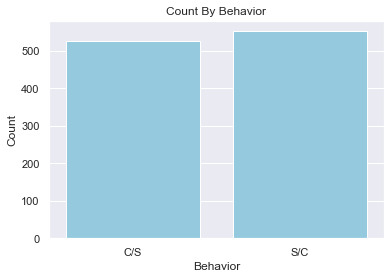

In [125]:
fig=sns.countplot(df_mice_fillna['Behavior'], color="skyblue")
fig.set_title("Count By Behavior")
fig.set_ylabel("Count")

Text(0, 0.5, 'Count')

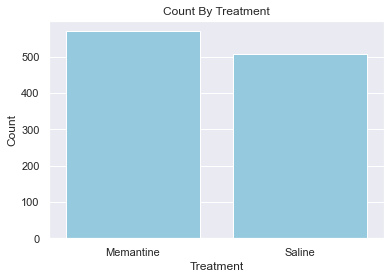

In [126]:
  fig=sns.countplot(df_mice_fillna['Treatment'], color="skyblue")
fig.set_title("Count By Treatment")
fig.set_ylabel("Count")

Text(0, 0.5, 'Count')

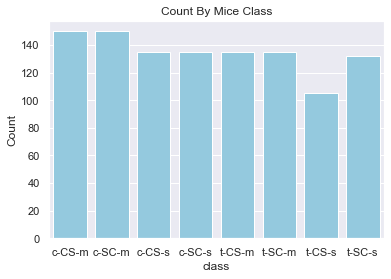

In [128]:
  fig=sns.countplot(df_mice_fillna['class'], color="skyblue")
fig.set_title("Count By Mice Class")
fig.set_ylabel("Count")

## Exploring the highly correlated features

In [161]:
df_corr = df_mice_fillna.iloc[:, 0:77].corr().abs()
df1 = df_corr.stack().reset_index()
df1.columns = ['Feature1','Feature2','correlation']
mask =  df1['Feature1'] != df1['Feature2']
df2 = df1[mask].sort_values(by = 'correlation',ascending = False)
df2.head(20)

,Feature1,Feature2,correlation
4151,ARC_N,pS6_N,1.000000
5443,pS6_N,ARC_N,1.000000
1540,BRAF_N,DYRK1A_N,0.959578
20,DYRK1A_N,BRAF_N,0.959578
77,ITSN1_N,DYRK1A_N,0.959512
1,DYRK1A_N,ITSN1_N,0.959512
245,NR1_N,pNR1_N,0.947872
1081,pNR1_N,NR1_N,0.947872
10,DYRK1A_N,pERK_N,0.945719
770,pERK_N,DYRK1A_N,0.945719


Text(0.5, 1.0, ' Preotein Expression value of ARC_N vs pS6_N')

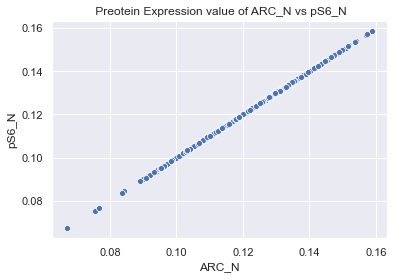

In [158]:
fig = sns.scatterplot( x = "ARC_N", y = "pS6_N",data = df_mice_fillna )
fig.set_title(" Preotein Expression value of ARC_N vs pS6_N")

Text(0.5, 1.0, 'Distribution of pS6_N across Mice classes')

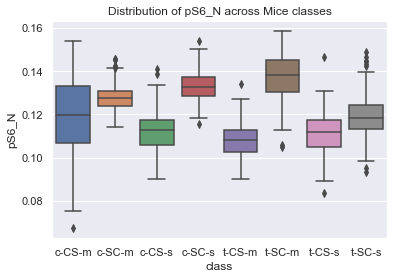

In [165]:
fig = sns.boxplot(x="class" ,y="pS6_N", data=df_mice_fillna)
fig.set_title("Distribution of pS6_N across Mice classes")

Text(0.5, 1.0, 'Distribution of ARC_N across Mice classes')

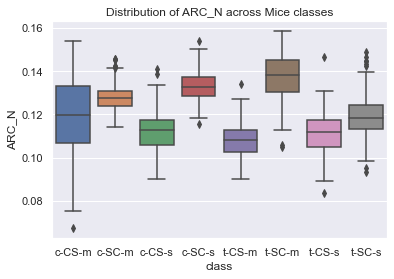

In [166]:
fig = sns.boxplot(x="class" ,y="ARC_N", data=df_mice_fillna)
fig.set_title("Distribution of ARC_N across Mice classes")

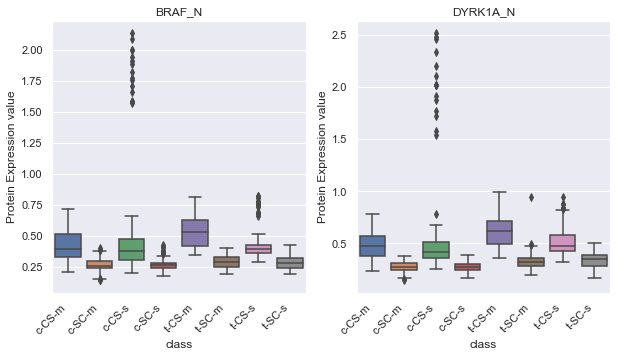

In [170]:
f, axes = plt.subplots(1, 2, figsize=(10, 5))
for ax, feature in zip(axes.flat, ['BRAF_N','DYRK1A_N']):
    sns.boxplot(x="class" ,y=feature, data=df_mice_fillna, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title(feature)
    ax.set_ylabel("Protein Expression value")

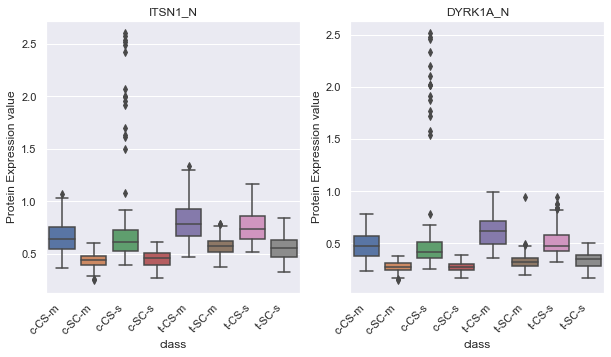

In [173]:
f, axes = plt.subplots(1, 2, figsize=(10, 5))
for ax, feature in zip(axes.flat, ['ITSN1_N','DYRK1A_N']):
    sns.boxplot(x="class" ,y=feature, data=df_mice_fillna, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title(feature)
    ax.set_ylabel("Protein Expression value")

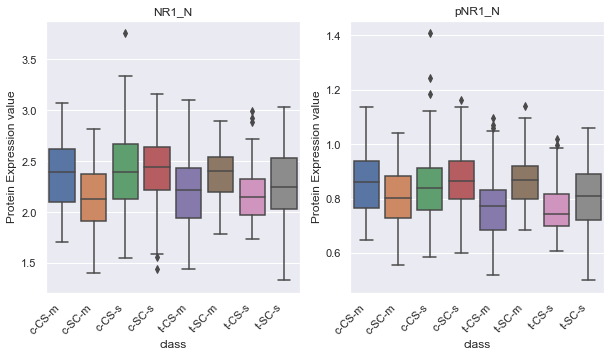

In [174]:
f, axes = plt.subplots(1, 2, figsize=(10, 5))
for ax, feature in zip(axes.flat, ['NR1_N','pNR1_N']):
    sns.boxplot(x="class" ,y=feature, data=df_mice_fillna, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title(feature)
    ax.set_ylabel("Protein Expression value")

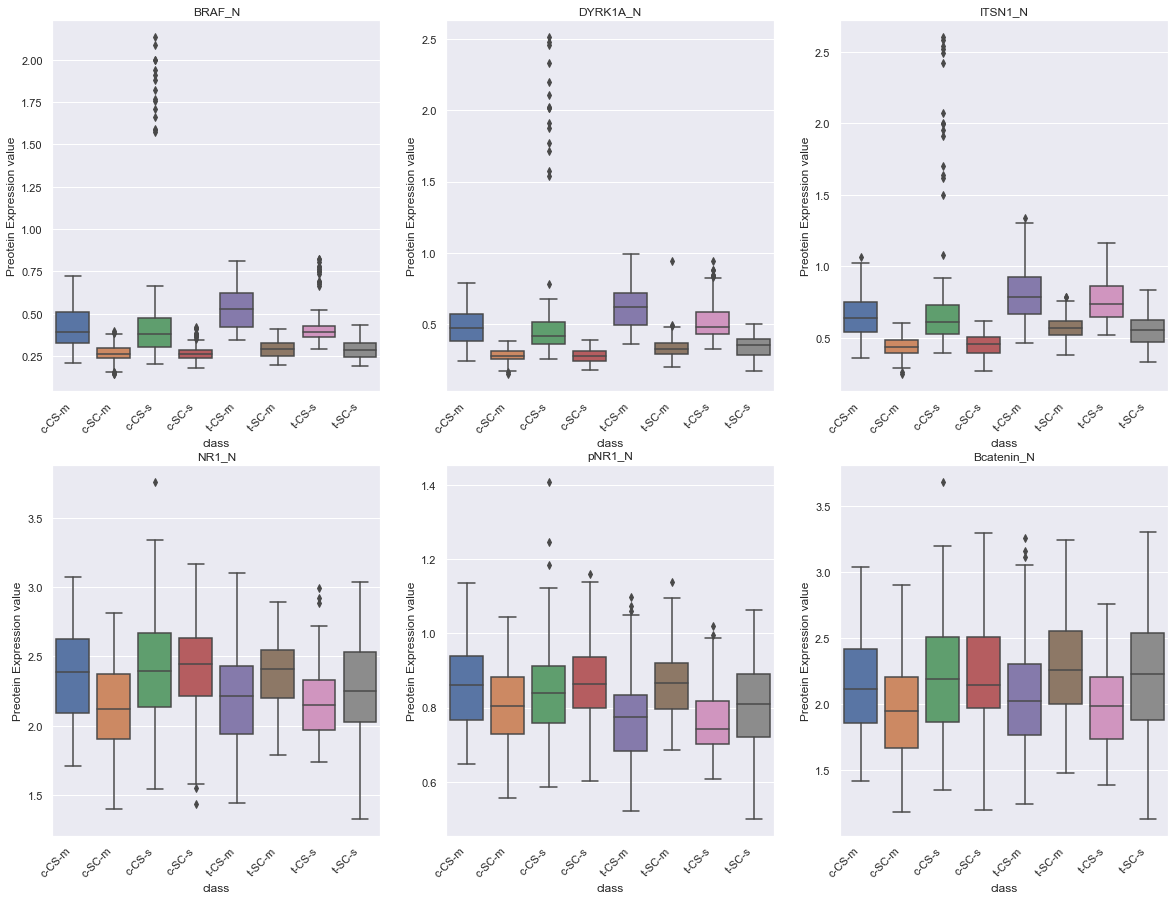

In [164]:
f, axes = plt.subplots(2, 3, figsize=(20, 15))
for ax, feature in zip(axes.flat, ['BRAF_N','DYRK1A_N','ITSN1_N','NR1_N','pNR1_N','Bcatenin_N']):
    sns.boxplot(x="class" ,y=feature, data=df_mice_fillna, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title(feature)
    ax.set_ylabel("Preotein Expression value")

### KNeighboursClassifier Feature selection using Hill climbing Technique 

In [79]:
data_ht = df_mice_fillna.iloc[:,0:77]
data_ht.shape

(1077, 77)

In [80]:
data_standard_full = preprocessing.StandardScaler().fit_transform(data_ht)

In [81]:
target = df_mice_fillna.loc[:,'class']

In [82]:
target_encoded_replace = pd.Series(target).replace({'c-CS-m': 0, 'c-SC-m': 1,'t-CS-m': 2, 'c-SC-s': 3,
                                                    't-SC-m': 4,'c-CS-s': 5,'t-SC-s':6,'t-CS-s':7}).values

np.unique(target_encoded_replace, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([150, 150, 135, 135, 135, 135, 132, 105], dtype=int64))

In [83]:
new_Ind = []
cur_MaxScore = 0.0
col_num = 76
col_Ind_Random = shuffle(range(0,col_num), random_state=1)
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = data_standard_full[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData,
    target_encoded_replace, test_size=0.4, random_state=0)
    clf = KNeighborsClassifier()
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.20185614849187936
Score with 2 selected features: 0.3619489559164733
Score with 3 selected features: 0.6380510440835266
Score with 4 selected features: 0.6519721577726219
Score with 5 selected features: 0.6728538283062645
Score with 6 selected features: 0.7331786542923434
Score with 7 selected features: 0.7517401392111369
Score with 8 selected features: 0.7749419953596288
Score with 9 selected features: 0.777262180974478
Score with 10 selected features: 0.7935034802784223
Score with 11 selected features: 0.8352668213457076
Score with 12 selected features: 0.8445475638051044
Score with 13 selected features: 0.8445475638051044
Score with 14 selected features: 0.877030162412993
Score with 15 selected features: 0.8955916473317865
Score with 16 selected features: 0.8979118329466357
Score with 17 selected features: 0.9002320185614849
Score with 18 selected features: 0.9118329466357309
Score with 19 selected features: 0.91415313225058
Score with 20 selected f

In [84]:
 df_mice_fillna.iloc[:, new_Ind].columns

Index(['AKT_N', 'Tau_N', 'pERK_N', 'pCFOS_N', 'nNOS_N', 'JNK_N', 'MTOR_N',
       'P38_N', 'P3525_N', 'P70S6_N', 'CDK5_N', 'BDNF_N', 'MEK_N', 'pNUMB_N',
       'pNR2A_N', 'NUMB_N', 'pMTOR_N', 'IL1B_N', 'EGR1_N', 'SHH_N', 'NR1_N',
       'GluR3_N', 'pPKCAB_N', 'DYRK1A_N', 'pPKCG_N', 'pCAMKII_N', 'H3AcK18_N',
       'SOD1_N', 'APP_N', 'ADARB1_N', 'Ubiquitin_N', 'pNR1_N', 'pJNK_N',
       'pRSK_N', 'BRAF_N', 'GSK3B_N', 'ITSN1_N', 'pAKT_N', 'PKCA_N'],
      dtype='object')

In [85]:
features_selected = ['AKT_N', 'Tau_N', 'pERK_N', 'pCFOS_N', 'nNOS_N', 'JNK_N', 'MTOR_N',
       'P38_N', 'P3525_N', 'P70S6_N', 'CDK5_N', 'BDNF_N', 'MEK_N', 'pNUMB_N',
       'pNR2A_N', 'NUMB_N', 'pMTOR_N', 'IL1B_N', 'EGR1_N', 'SHH_N', 'NR1_N',
       'GluR3_N', 'pPKCAB_N', 'DYRK1A_N', 'pPKCG_N', 'pCAMKII_N', 'H3AcK18_N',
       'SOD1_N', 'APP_N', 'ADARB1_N', 'Ubiquitin_N', 'pNR1_N', 'pJNK_N',
       'pRSK_N', 'BRAF_N', 'GSK3B_N', 'ITSN1_N', 'pAKT_N', 'PKCA_N']

In [86]:
data_sel_features =  data_standard_full[:, new_Ind]

In [87]:
data_sel_features.shape

(1077, 39)

### Hyper parameter tuning KNN

We need to tune the hyperparamters K value( number of neighbours) and p value.
we divide the data into test and train and do hyperparameter tuning using the training set.
We use crossvalidation to tune the hyperparameters to avoid overfitting as our dataset only has 1077 obsservations.

We consider K values between 1 and 10
P vales 1,2,3 and 5. We have 39 features , so we will not choose the p values higher than 5 
to make sure distance is not based on only dominant feature and all the features have a say.


In [177]:
Data_knn_train, Data_knn_test, target_knn_train, target_knn_test = train_test_split(data_sel_features, 
                                                    target_encoded_replace, 
                                                    test_size = 0.3, 
                                                    random_state=8,stratify =target_encoded_replace )

In [178]:
Data_knn_train.shape

(753, 39)

In [179]:
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7,8,9,10], 
              'p': [1, 2,3,4,5],
             'weights':[ 'distance'] }

In [180]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [181]:
gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)
gs_KNN.fit(Data_knn_train, target_knn_train);



Fitting 15 folds for each of 50 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:  3.0min finished


In [182]:
gs_KNN.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=3,
                     weights='distance')

In [183]:
gs_KNN.best_score_

0.9906990434142754

### Model Evaluation

Now that we have got our best KNN classifier with k= 1 and p= 3 we will go ahead and evaluate the model on the test set.


In [212]:
y_pred=gs_KNN.predict(Data_knn_test)
accuracy_score_knn = metrics.accuracy_score(target_knn_test,y_pred)

In [218]:
conf_matrix_knn = metrics.confusion_matrix(target_knn_test,y_pred)

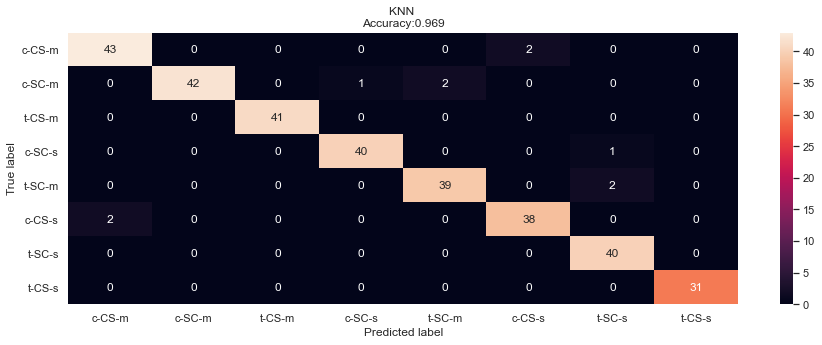

In [219]:
cm_df_knn = pd.DataFrame(conf_matrix_knn,
                     index = ['c-CS-m', 'c-SC-m','t-CS-m', 'c-SC-s','t-SC-m','c-CS-s','t-SC-s','t-CS-s'], 
                     columns = ['c-CS-m', 'c-SC-m','t-CS-m', 'c-SC-s','t-SC-m','c-CS-s','t-SC-s','t-CS-s'])

plt.figure(figsize=(15,5))
sns.heatmap(cm_df_knn, annot=True)
plt.title('KNN \nAccuracy:{0:.3f}'.format(accuracy_score_knn))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [215]:
print(metrics.classification_report(target_knn_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        45
           1       1.00      0.93      0.97        45
           2       1.00      1.00      1.00        41
           3       0.98      0.98      0.98        41
           4       0.95      0.95      0.95        41
           5       0.95      0.95      0.95        40
           6       0.93      1.00      0.96        40
           7       1.00      1.00      1.00        31

    accuracy                           0.97       324
   macro avg       0.97      0.97      0.97       324
weighted avg       0.97      0.97      0.97       324



### Decision Tree Feature selection using Hill climbing

In [100]:
new_Ind = []
cur_MaxScore = 0.0
col_num = 76
col_Ind_Random = shuffle(range(0,col_num), random_state=1)
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = data_standard_full[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData,
    target_encoded_replace, test_size=0.4, random_state=0)
    clf = DecisionTreeClassifier()
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.16009280742459397
Score with 2 selected features: 0.37819025522041766
Score with 3 selected features: 0.6078886310904872
Score with 4 selected features: 0.6241299303944315
Score with 5 selected features: 0.6450116009280742
Score with 6 selected features: 0.6751740139211136
Score with 7 selected features: 0.6960556844547564
Score with 8 selected features: 0.7006960556844548
Score with 9 selected features: 0.7122969837587007
Score with 10 selected features: 0.7331786542923434
Score with 11 selected features: 0.7563805104408353
Score with 12 selected features: 0.7563805104408353
Score with 13 selected features: 0.7610208816705336
Score with 14 selected features: 0.7679814385150812
Score with 15 selected features: 0.7842227378190255
Score with 16 selected features: 0.8167053364269141
Score with 17 selected features: 0.8306264501160093
Score with 18 selected features: 0.8445475638051044
Score with 19 selected features: 0.851508120649652
Score with 20 select

In [101]:
 df_mice_fillna.iloc[:, new_Ind].columns

Index(['AKT_N', 'Tau_N', 'pERK_N', 'pCFOS_N', 'nNOS_N', 'RAPTOR_N', 'MTOR_N',
       'P38_N', 'P3525_N', 'P70S6_N', 'pNUMB_N', 'NUMB_N', 'BCL2_N', 'S6_N',
       'DYRK1A_N', 'pPKCG_N', 'ERBB4_N', 'SOD1_N', 'APP_N', 'NR2A_N'],
      dtype='object')

In [102]:
data_sel_features_dt = data_standard_full[:, new_Ind]

In [103]:
features_selected = ['AKT_N', 'Tau_N', 'pERK_N', 'pCFOS_N', 'nNOS_N', 'JNK_N', 'MTOR_N',
       'P38_N', 'P3525_N', 'P70S6_N', 'CDK5_N', 'BDNF_N', 'MEK_N', 'pNUMB_N',
       'pNR2A_N', 'NUMB_N', 'pMTOR_N', 'IL1B_N', 'EGR1_N', 'SHH_N', 'NR1_N',
       'GluR3_N', 'pPKCAB_N', 'DYRK1A_N', 'pPKCG_N', 'pCAMKII_N', 'H3AcK18_N',
       'SOD1_N', 'APP_N', 'ADARB1_N', 'Ubiquitin_N', 'pNR1_N', 'pJNK_N',
       'pRSK_N', 'BRAF_N', 'GSK3B_N', 'ITSN1_N', 'pAKT_N', 'PKCA_N']

In [ ]:
dt= 'RAPTOR_N', 'RRP1_N','BCL2_N','CAMKII_N','S6_N','BAX_N','NR2A_N', 'pCASP9_N', 'AcetylH3K9_N','pNR2B_N', 'pELK_N'

In [ ]:
knn='JNK_N','P3525_N','CDK5_N','BDNF_N','MEK_N', 'pNR2A_N', 'NUMB_N', 'IL1B_N', 'EGR1_N', 'SHH_N', 'NR1_N'
,'GluR3_N', 'pPKCAB_N','pCAMKII_N','APP_N', 'Ubiquitin_N','pJNK_N', 'pRSK_N', 'BRAF_N', 'GSK3B_N',
'ITSN1_N', 'pAKT_N', 'PKCA_N'

In [ ]:
Common_features =  'AKT_N', 'Tau_N', 'pERK_N', 'pCFOS_N', 'nNOS_N','MTOR_N','P38_N','P70S6_N','pNUMB_N','pMTOR_N', 'pPKCG_N'
'ADARB1_N','pNR1_N','pNR1_N'

### Hyper Parameter tuning Decision Tree

we divide the data into test and train and do hyperparameter tuning using the training set.
We use crossvalidation to tune the hyperparameters to avoid overfitting as our dataset only has 1077 obsservations.

criterion:tuning with both gini and entropy
max_features: we have 27 features selected from Hillclimbing technique. as per the best practices choosing 30-40% of 27 features , so tuning with  9,10, 11.
max_depth: Tuning with values from 1 to 10 as higher values can lead to overfitting.
min_samples_split:Tuning with values between 2 and 7 as higher values can lead to overfitting.
min_samples_leaf:Tuning with values 1,2,3 as higher values can lead to overfitting.


In [193]:
Data_train, Data_test, target_train, target_test = train_test_split(data_sel_features_dt, 
                                                    target_encoded_replace, 
                                                    test_size = 0.3, 
                                                    random_state=8,stratify=target_encoded_replace )

In [197]:

df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion' : ['gini','entropy'],
             'max_features':[6,7,8],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12],
             'min_samples_split': [2,3,4,5,6,7],
            'min_samples_leaf': [1,2,3]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(Data_train, target_train);

Fitting 15 folds for each of 1296 candidates, totalling 19440 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 19440 out of 19440 | elapsed:  1.3min finished


In [198]:
gs_DT.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=999, splitter='best')

In [221]:
gs_DT.best_score_

0.7927799852832965

### Model Evaluation - Decision tree

In [222]:
y_pred_dt = gs_DT.best_estimator_.predict(Data_test)

In [223]:
accuracy_score_dt = metrics.accuracy_score(target_test,y_pred_dt)

In [224]:
conf_matrix_dt = metrics.confusion_matrix(target_test,y_pred_dt)

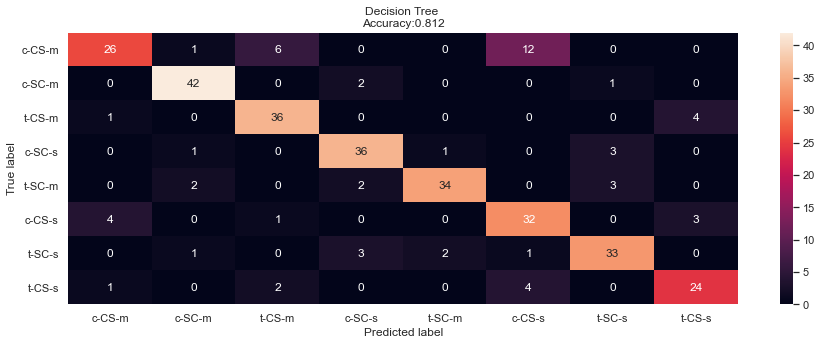

In [225]:
# Creates a confusion matrix

# Transform to df for easier plotting
cm_df = pd.DataFrame(conf_matrix_dt,
                     index = ['c-CS-m', 'c-SC-m','t-CS-m', 'c-SC-s','t-SC-m','c-CS-s','t-SC-s','t-CS-s'], 
                     columns = ['c-CS-m', 'c-SC-m','t-CS-m', 'c-SC-s','t-SC-m','c-CS-s','t-SC-s','t-CS-s'])

plt.figure(figsize=(15,5))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score_dt))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [226]:
print(metrics.classification_report(target_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.58      0.68        45
           1       0.89      0.93      0.91        45
           2       0.80      0.88      0.84        41
           3       0.84      0.88      0.86        41
           4       0.92      0.83      0.87        41
           5       0.65      0.80      0.72        40
           6       0.82      0.82      0.82        40
           7       0.77      0.77      0.77        31

    accuracy                           0.81       324
   macro avg       0.81      0.81      0.81       324
weighted avg       0.82      0.81      0.81       324



In [244]:
selected_features_dt = ['AKT_N', 'Tau_N', 'pERK_N', 'pCFOS_N', 'nNOS_N', 'RAPTOR_N', 'MTOR_N',
       'P38_N', 'P70S6_N', 'RRP1_N', 'pNUMB_N', 'pMTOR_N', 'BCL2_N',
       'CAMKII_N', 'S6_N', 'DYRK1A_N', 'pPKCG_N', 'H3AcK18_N', 'SOD1_N',
       'ADARB1_N', 'BAX_N', 'NR2A_N', 'pNR1_N', 'pCASP9_N', 'AcetylH3K9_N',
       'pNR2B_N', 'pELK_N']

In [245]:
features_selected = ['AKT_N', 'Tau_N', 'pERK_N', 'pCFOS_N', 'nNOS_N', 'JNK_N', 'MTOR_N',
       'P38_N', 'P3525_N', 'P70S6_N', 'CDK5_N', 'BDNF_N', 'MEK_N', 'pNUMB_N',
       'pNR2A_N', 'NUMB_N', 'pMTOR_N', 'IL1B_N', 'EGR1_N', 'SHH_N', 'NR1_N',
       'GluR3_N', 'pPKCAB_N', 'DYRK1A_N', 'pPKCG_N', 'pCAMKII_N', 'H3AcK18_N',
       'SOD1_N', 'APP_N', 'ADARB1_N', 'Ubiquitin_N', 'pNR1_N', 'pJNK_N',
       'pRSK_N', 'BRAF_N', 'GSK3B_N', 'ITSN1_N', 'pAKT_N', 'PKCA_N']

In [246]:
knn=['JNK_N','P3525_N','CDK5_N','BDNF_N','MEK_N', 'pNR2A_N', 'NUMB_N', 'IL1B_N', 'EGR1_N', 'SHH_N', 'NR1_N'
,'GluR3_N', 'pPKCAB_N','pCAMKII_N','APP_N', 'Ubiquitin_N','pJNK_N', 'pRSK_N', 'BRAF_N', 'GSK3B_N',
'ITSN1_N', 'pAKT_N', 'PKCA_N']

In [247]:
dt= ['RAPTOR_N', 'RRP1_N','BCL2_N','CAMKII_N','S6_N','BAX_N','NR2A_N', 'pCASP9_N', 'AcetylH3K9_N','pNR2B_N', 'pELK_N']

In [248]:
Common_features =  ['AKT_N', 'Tau_N', 'pERK_N', 'pCFOS_N', 'nNOS_N','MTOR_N','P38_N','P70S6_N','pNUMB_N','pMTOR_N', 'pPKCG_N'
'ADARB1_N','pNR1_N','pNR1_N']

#### Exploring the features selected by Decision tree

In [249]:
fscores_genotype,pvalue_genotype = f_classif(df_mice_fillna.loc[:,selected_features_dt], df_mice_fillna.loc[:,'Genotype'])
fscores_treatment,pvalue_treatment = f_classif(df_mice_fillna.loc[:,selected_features_dt], df_mice_fillna.loc[:,'Treatment'])
fscores_behavior,pvalue_bhavior = f_classif(df_mice_fillna.loc[:,selected_features_dt], df_mice_fillna.loc[:,'Behavior'])
fscores_class,pvalue_class = f_classif(df_mice_fillna.loc[:,selected_features_dt], df_mice_fillna.loc[:,'class'])

In [250]:
scores = {'Feature': selected_features_dt,
        'Genotype':fscores_genotype,
        'Treatment':fscores_treatment,
        'Behavior':fscores_behavior,
        'class':fscores_class,
          
        }
df_fscores_dt = pd.DataFrame(scores,columns = ['Feature','Genotype','Treatment','Behavior','class'] )

In [251]:


data = df_fscores_dt.melt('Feature', var_name='Variable', value_name='Fscore')
data= data.sort_values(by='Fscore',ascending = False)

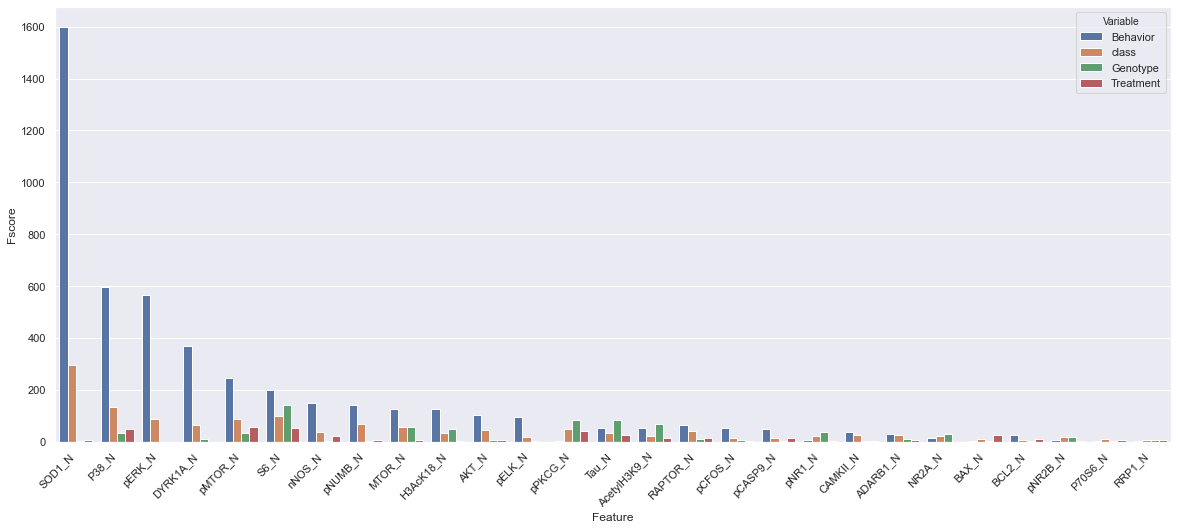

In [253]:

plt.figure(figsize=(20,8))
ax=sns.barplot(x='Feature', y='Fscore', hue='Variable', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

#### Exploring the features selected by KNearestNeighbours

Analysing the relationship of features selected( predictors) for Knearestneighboors 
with respect to Genotype, Behavior and treatment using Anova test as the predictors are numerical features.

In [254]:
fscores_knn_genotype,pvalue_genotype = f_classif(df_mice_fillna.loc[:,features_selected], df_mice_fillna.loc[:,'Genotype'])
fscores_knn_treatment,pvalue_treatment = f_classif(df_mice_fillna.loc[:,features_selected], df_mice_fillna.loc[:,'Treatment'])
fscores_knn_behavior,pvalue_bhavior = f_classif(df_mice_fillna.loc[:,features_selected], df_mice_fillna.loc[:,'Behavior'])
fscores_knn_class,pvalue_class = f_classif(df_mice_fillna.loc[:,features_selected], df_mice_fillna.loc[:,'class'])

In [255]:
scores = {'Feature': features_selected,
        'Genotype':fscores_knn_genotype,
        'Treatment':fscores_knn_treatment,
        'Behavior':fscores_knn_behavior,
        'class':fscores_knn_class,
          
        }
df_fscores_knn = pd.DataFrame(scores,columns = ['Feature','Genotype','Treatment','Behavior','class'] )

In [256]:


df_fscores_knn = df_fscores_knn.melt('Feature', var_name='Variable', value_name='Fscore')
df_fscores_knn= df_fscores_knn.sort_values(by='Fscore',ascending = False)

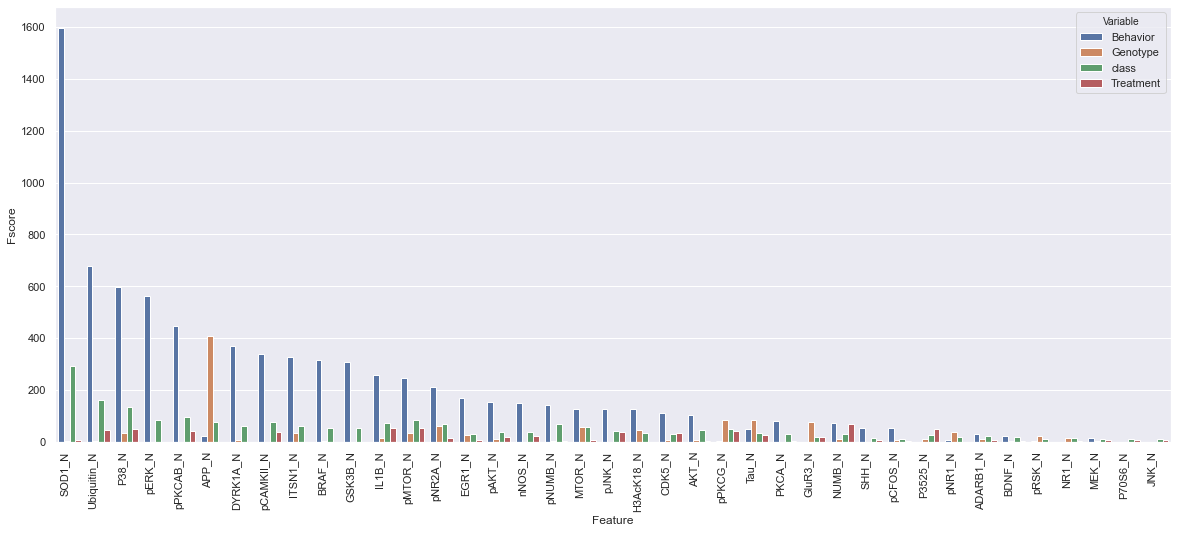

In [257]:


plt.figure(figsize=(20,8))
ax=sns.barplot(x='Feature', y='Fscore', hue='Variable', data=df_fscores_knn)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.show()

Behavior:
Many predictors show very strong relationship to behavior especially SOD1_N has a very strong relationship.
Ubiquitin_N,pERK_N,P38_N,pPKCAB_N,DYRK1A_N also show medium relationship to behavior.

Genotype:
Interestingly none of the predictors show Strong relationship to Genotype.Only APP_N has some relationship, however it is not very strong.

Treatment:
None of the proteins show relationship to treatment.NUMB_N,IL1B_N,PMTOR_N has a weak relationship


In [258]:
df_mice_fillna.loc[:,'Genotype'].value_counts()

Control    570
Ts65Dn     507
Name: Genotype, dtype: int64

In [259]:
df_mice_fillna.loc[:,'Treatment'].value_counts()

Memantine    570
Saline       507
Name: Treatment, dtype: int64

In [260]:
df_mice_fillna.loc[:,'Behavior'].value_counts()

S/C    552
C/S    525
Name: Behavior, dtype: int64

We noticed that none of the predictors have a strong relationship to genotype and Behavior. 
So it will be interesting to see what predictors are able to seperate the genotype and Behavior. 

Plotting the boxplots of protein features against the 8 mice classes to see if there is any pattern.

SOD1_N seperates the CS mouse very nicely.CS mouse seems to have high protein expression values where as SC mouse seems to have lower values.
pPKCAB_N seems to separate the c-CS and t-CS classes.Genotype and Behavior together. 



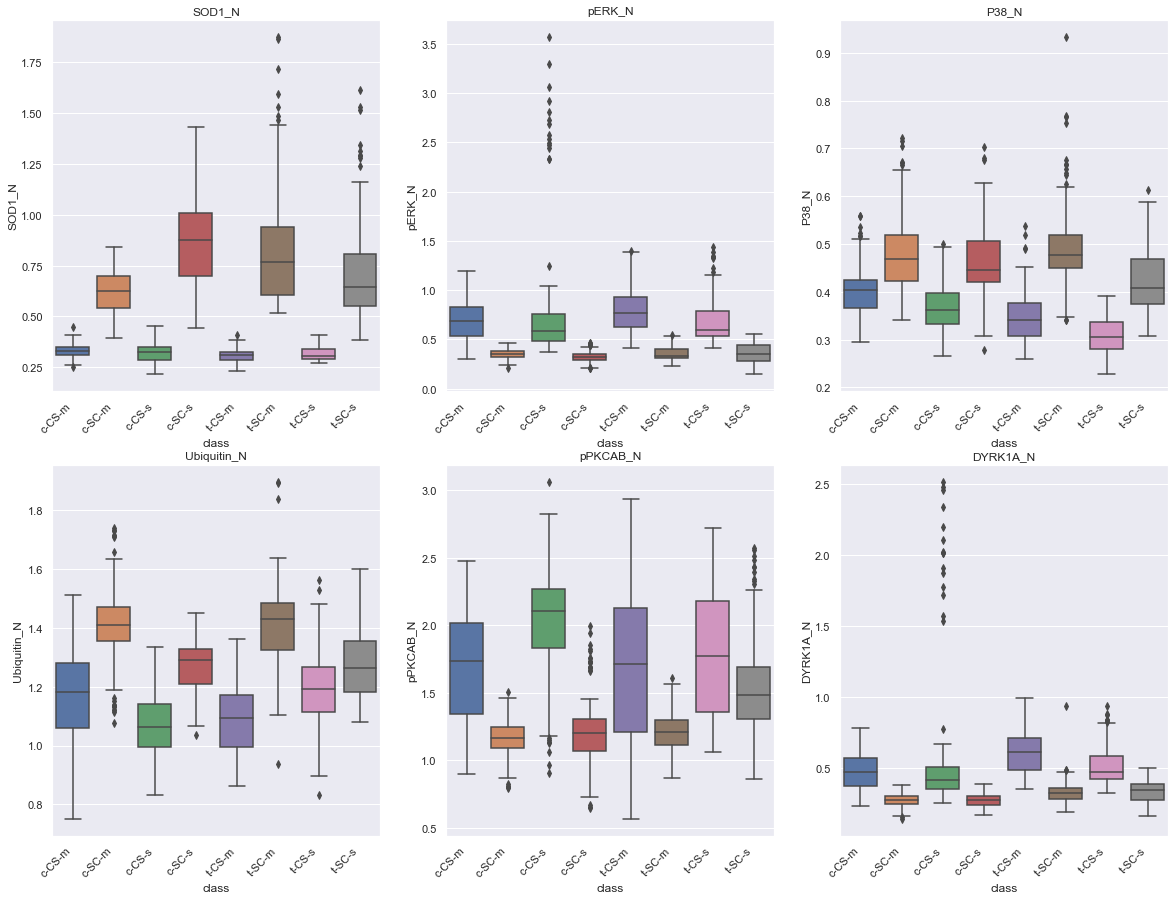

In [263]:
f, axes = plt.subplots(2, 3, figsize=(20, 15))
for ax, feature in zip(axes.flat, ['SOD1_N','pERK_N','P38_N','Ubiquitin_N','pPKCAB_N','DYRK1A_N','IL1B_N']):
    sns.boxplot(x="class" ,y=feature, data=df_mice_fillna, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title(feature)

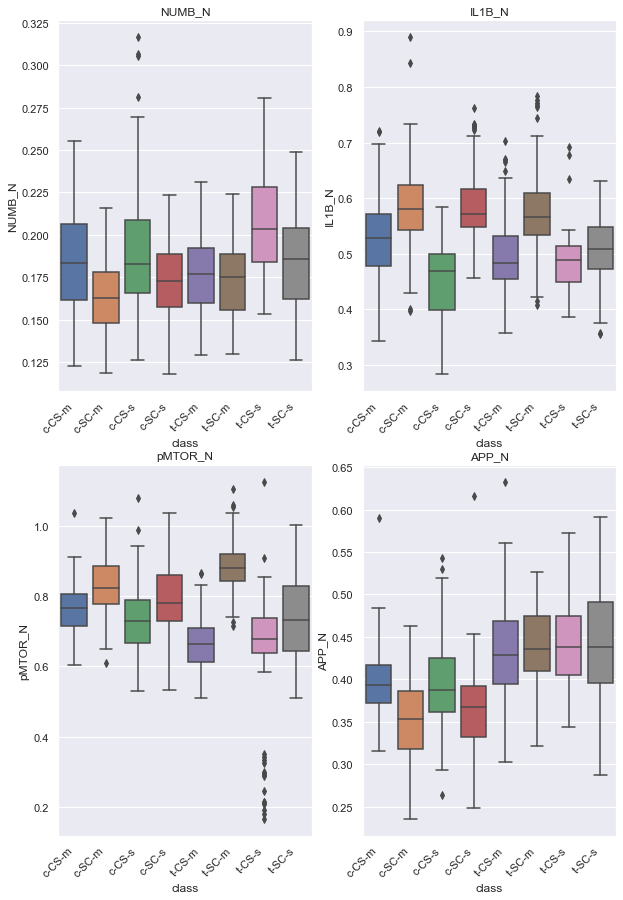

In [264]:
f, axes = plt.subplots(2, 2, figsize=(10, 15))
for ax, feature in zip(axes.flat, ['NUMB_N','IL1B_N','pMTOR_N','APP_N']):
    sns.boxplot(x="class" ,y=feature, data=df_mice_fillna, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title(feature)  